In [3]:
import pandas as pd
df = pd.read_excel(r"D:\jupyter\innovation\ila_process_2024\radiomicdata\test.xlsx")

In [5]:
df.head()

,Progress,Whole_Lung,diagnostics_Image-original_Mean,diagnostics_Mask-original_Hash,diagnostics_Mask-original_VolumeNum,diagnostics_Mask-original_CenterOfMassIndex,diagnostics_Image-interpolated_Minimum,diagnostics_Image-interpolated_Maximum,diagnostics_Mask-interpolated_Spacing,diagnostics_Mask-interpolated_VolumeNum,...,wavelet-LLL_gldm_GrayLevelVariance,wavelet-LLL_gldm_HighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceEmphasis,wavelet-LLL_gldm_LargeDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_LargeDependenceLowGrayLevelEmphasis,wavelet-LLL_gldm_LowGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceEmphasis,wavelet-LLL_gldm_SmallDependenceHighGrayLevelEmphasis,wavelet-LLL_gldm_SmallDependenceLowGrayLevelEmphasis,Unnamed: 1230
0,0,1,-667.853928,3071,23167450,2,-245.018997,-1041,3123,3896752,...,131217.056380,301.535602,2021.735256,15.824430,19911.521119,0.014836,0.000776,0.330770,1030.737091,0.000192
1,0,0,-597.732544,1592,370079,1,-429.386646,-1037,1260,61857,...,2339.058296,212.143653,666.099455,14.102769,5108.562556,0.120767,0.006012,0.317192,368.386547,0.001436
2,0,1,-631.732480,3071,15166086,5,-208.601276,-1052,3095,2551642,...,77097.060680,324.391444,2189.843003,18.706108,25004.697671,0.017101,0.000727,0.303615,1042.400778,0.000156
3,0,0,-559.623398,3071,426968,5,-324.531775,-1032,1590,65260,...,1590.585259,467.926461,1469.674180,10.719920,7045.566273,0.039479,0.002415,0.401185,897.803885,0.000643
4,0,0,-711.144222,3071,149642,1,-309.314212,-971,1395,25350,...,551.137751,1011.434292,1973.875385,10.330888,5754.449822,0.116967,0.006010,0.427055,1502.340664,0.001399


In [29]:
#如需分析ILA-B OR ILA-C 的非全肺亚型
#df=df[df['Whole_Lung']==0]
#df.reset_index(drop=True, inplace=True)

# 构建随机森林模型

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
features = df.drop('Progress', axis=1)
target = df['Progress']

# 数据归一化
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 填补空缺数据
imputer = SimpleImputer()
features_filled = imputer.fit_transform(features_scaled)


X_train, X_test, y_train, y_test = train_test_split(features_filled,target,test_size=0.3,shuffle=True,random_state=2024)
#X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,shuffle=True)
# 建立随机森林分类器
rf = RandomForestClassifier()

# 在训练集上训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)
y_trainpred = rf.predict(X_train)
# 计算预测准确率
accuracy1=accuracy_score(y_train,y_trainpred)
print("预测训练集准确率：", accuracy1)
accuracy = accuracy_score(y_test, y_pred)
print("预测检验集准确率：", accuracy)

预测训练集准确率： 1.0
预测检验集准确率： 0.8095238095238095


In [37]:
test_Y=y_test
y_pred_tree=y_pred
from sklearn.metrics import recall_score,f1_score,accuracy_score,auc,precision_score,roc_curve
print('召回率：{}'.format(recall_score(test_Y,y_pred_tree)))
print('精确率：{}'.format(precision_score(test_Y,y_pred_tree)))
print('准确率：{}'.format(accuracy_score(test_Y,y_pred_tree, )))
print('F1值：{}'.format(f1_score(test_Y,y_pred_tree, )))
fpr,tpr,thresholds = roc_curve(test_Y, list(rf.predict_proba(X_test)[:, 1]),pos_label=1)
print('AUC面积：{}'.format(auc(fpr, tpr)))

print('{}'.format(recall_score(test_Y,y_pred_tree)))
print('{}'.format(precision_score(test_Y,y_pred_tree)))
print('{}'.format(accuracy_score(test_Y,y_pred_tree, )))
print('{}'.format(f1_score(test_Y,y_pred_tree, )))
fpr,tpr,thresholds = roc_curve(test_Y, list(rf.predict_proba(X_test)[:, 1]),pos_label=1)
print('{}'.format(auc(fpr, tpr)))

召回率：0.6666666666666666
精确率：0.8571428571428571
准确率：0.8095238095238095
F1值：0.75
AUC面积：0.875
0.6666666666666666
0.8571428571428571
0.8095238095238095
0.75
0.875


# 绘制ROC曲线

roc_auc: 0.8222222222222222


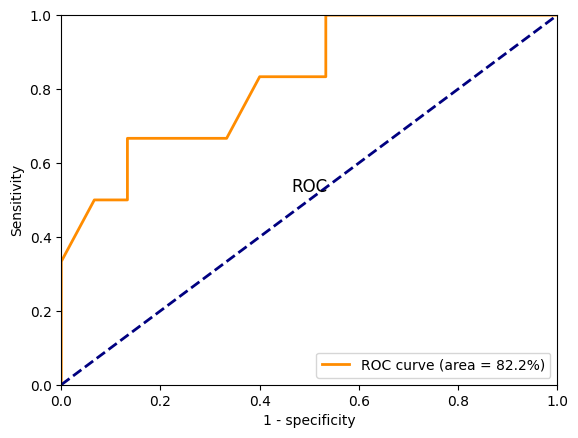

In [32]:
roc_auc = auc(fpr,tpr)   # 准确率代表所有正确的占所有数据的比值
print('roc_auc:', roc_auc)
lw = 2
fig=plt.subplot(1,1,1)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %.1f%%)' % (roc_auc * 100))  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('Sensitivity')
plt.title('ROC', y=0.5)
plt.legend(loc="lower right")
plt.show()


C:\Users\86138\AppData\Local\Temp\ipykernel_31384\1187287441.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_xticks()])
C:\Users\86138\AppData\Local\Temp\ipykernel_31384\1187287441.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])


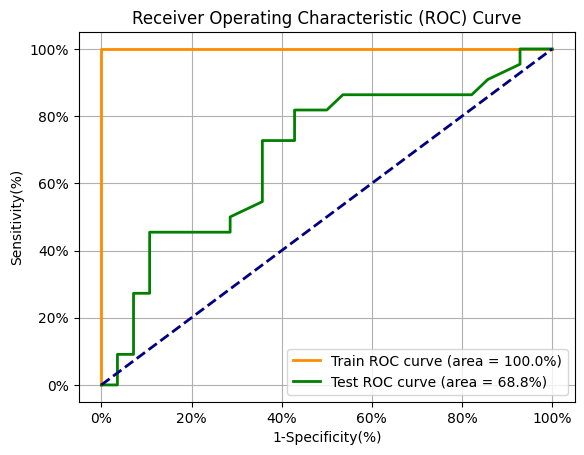

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression  # 假设你使用逻辑回归作为分类器

# 假设 X_train, y_train 是训练集的特征和标签
# 假设 X_test, y_test 是检验集的特征和标签

# 计算训练集的ROC曲线
y_train_scores = rf.predict_proba(X_train)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_scores)
roc_auc_train = roc_auc_score(y_train, y_train_scores)

# 计算检验集的ROC曲线
y_test_scores = rf.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_scores)
roc_auc_test = roc_auc_score(y_test, y_test_scores)

# 设置图形的线宽
lw = 2

# 绘制训练集的ROC曲线
plt.plot(fpr_train, tpr_train, color='darkorange', lw=lw, label='Train ROC curve (area = %.1f%%)' % (roc_auc_train * 100))

# 绘制检验集的ROC曲线
plt.plot(fpr_test, tpr_test, color='green', lw=lw, label='Test ROC curve (area = %.1f%%)' % (roc_auc_test * 100))

# 添加参考线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

# 添加标签
plt.xlabel('1-Specificity(%)')
plt.ylabel('Sensitivity(%)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.gca().set_xticklabels(['{:.0f}%'.format(x * 100) for x in plt.gca().get_xticks()])
plt.gca().set_yticklabels(['{:.0f}%'.format(y * 100) for y in plt.gca().get_yticks()])

plt.savefig(r"D:\jupyter\innovation\ila_process_2024\figure\1alldata\rfROC_nowhole.png", dpi=600,bbox_inches = 'tight')
# 显示网格
plt.grid(True)

# 显示图形
plt.show()



# 查看混淆矩阵

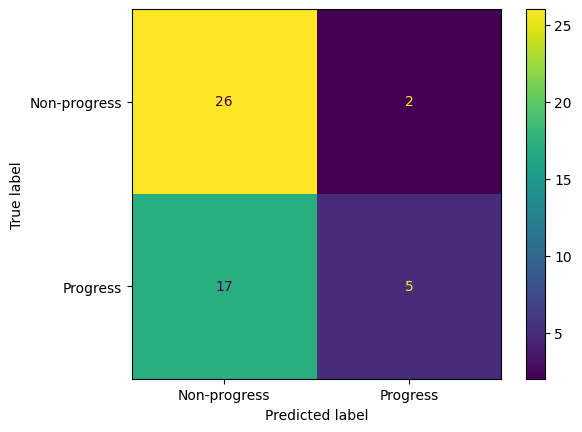

In [12]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test,y_pred_tree)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-progress', 'Progress']
cm_display.plot()


# 查看重要特征

                                            Feature  Importance
933                    wavelet-HLH_glrlm_RunEntropy    0.013237
949         wavelet-HLH_glszm_SizeZoneNonUniformity    0.008269
896                    wavelet-HLH_firstorder_Range    0.007789
203          log-sigma-2-0-mm-3D_firstorder_Maximum    0.007670
929               wavelet-HLH_glrlm_LongRunEmphasis    0.007271
22                       original_shape_SurfaceArea    0.007009
954                   wavelet-HLH_glszm_ZoneEntropy    0.006752
212      log-sigma-2-0-mm-3D_firstorder_TotalEnergy    0.006735
1192       wavelet-LLL_glrlm_RunLengthNonUniformity    0.006670
905              wavelet-HLH_glcm_ClusterProminence    0.006430
1189  wavelet-LLL_glrlm_LongRunLowGrayLevelEmphasis    0.006421
33                         original_firstorder_Mean    0.006416
1168             wavelet-LLL_glcm_DifferenceAverage    0.006203
1126                  wavelet-HHH_glszm_ZoneEntropy    0.005911
476           log-sigma-5-0-mm-3D_glcm_C

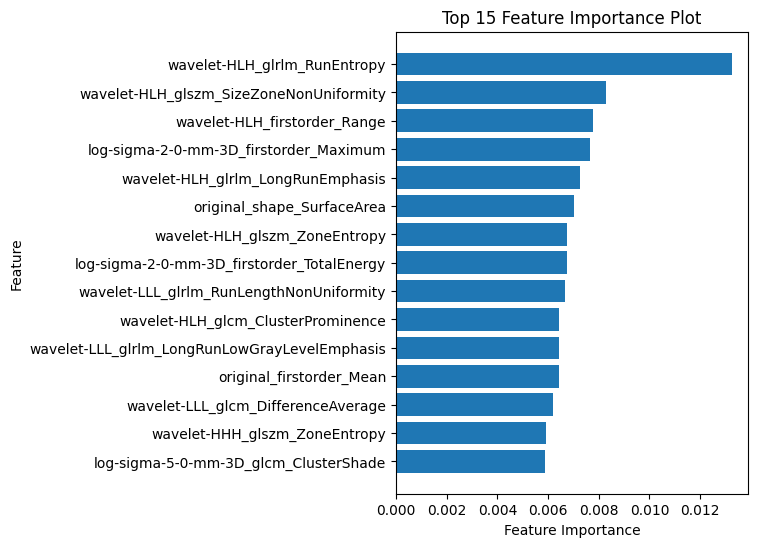

In [13]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 获取特征的重要性分数

feature_importance = rf.feature_importances_

# 获取特征名称
feature_names = features.columns

# 创建一个DataFrame来存储特征的重要性
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 根据重要性分数降序排列特征
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 只选择权重最高的前15个特征
top_15_features = importance_df.head(15)

# 打印或保存权重最高的前15个特征
print(top_15_features)

# 可视化权重最高的前15个特征
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance Plot')
plt.gca().invert_yaxis()  # 反转y轴，以便重要性高的特征在顶部



# 构建可迭代优化的catboost模型

In [14]:
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from catboost import CatBoostClassifier, Pool
params = {'learning_rate': 0.01, 'depth': 6, 'bootstrap_type':'Bernoulli','random_seed':2023,
            'od_type': 'Iter', 'od_wait': 5, 'allow_writing_files': False,'task_type':'CPU'}



eval_dataset = Pool(X_test,
                    y_test)


catboost_model = CatBoostClassifier(iterations=60, **params)
catboost_model.fit(X_train, y_train,eval_set=eval_dataset,metric_period=50,use_best_model=True)


# 在测试集上进行预测
catboost_pred = catboost_model.predict(X_test)


# 计算均方误差
catboost_mse = accuracy_score(y_test, catboost_pred)
print(catboost_mse)

0:	learn: 0.6889496	test: 0.6917922	best: 0.6917922 (0)	total: 164ms	remaining: 9.65s
50:	learn: 0.5341954	test: 0.6563883	best: 0.6558082 (48)	total: 1.69s	remaining: 298ms
Stopped by overfitting detector  (5 iterations wait)

bestTest = 0.6558081922
bestIteration = 48

Shrink model to first 49 iterations.
0.62


In [15]:
test_Y=y_test
y_pred_tree=catboost_pred

from sklearn.metrics import recall_score,f1_score,accuracy_score,auc,precision_score,roc_curve
print('召回率：{}'.format(recall_score(test_Y,y_pred_tree)))
print('精确率：{}'.format(precision_score(test_Y,y_pred_tree)))
print('准确率：{}'.format(accuracy_score(test_Y,y_pred_tree, )))
print('F1-score：{}'.format(f1_score(test_Y,y_pred_tree)))
fpr,tpr,thresholds = roc_curve(test_Y, list(rf.predict_proba(X_test)[:, 1]),pos_label=1)
print('AUC面积：{}'.format(auc(fpr, tpr)))


print('{}'.format(recall_score(test_Y,y_pred_tree)))
print('{}'.format(precision_score(test_Y,y_pred_tree)))
print('{}'.format(accuracy_score(test_Y,y_pred_tree, )))
print('{}'.format(f1_score(test_Y,y_pred_tree, )))
fpr,tpr,thresholds = roc_curve(test_Y, list(rf.predict_proba(X_test)[:, 1]),pos_label=1)
print('{}'.format(auc(fpr, tpr)))

召回率：0.22727272727272727
精确率：0.7142857142857143
准确率：0.62
F1-score：0.3448275862068965
AUC面积：0.6883116883116884
0.22727272727272727
0.7142857142857143
0.62
0.3448275862068965
0.6883116883116884


roc_auc: 0.6883116883116884


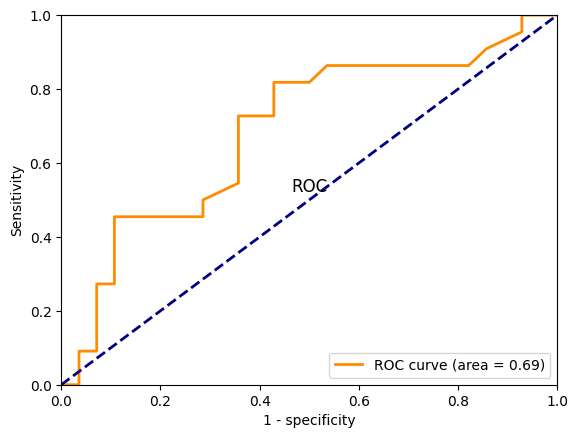

In [16]:
roc_auc = auc(fpr,tpr)   # 准确率代表所有正确的占所有数据的比值
print('roc_auc:', roc_auc)
lw = 2
fig=plt.subplot(1,1,1)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  # 假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('Sensitivity')
plt.title('ROC', y=0.5)
plt.legend(loc="lower right")
plt.savefig(r"D:\jupyter\innovation\ila_process_2024\figure\1alldata\3roc_catboost.jpg", dpi=600,bbox_inches = 'tight')
plt.show()


                                            Feature  Importance
933                    wavelet-HLH_glrlm_RunEntropy    0.013237
949         wavelet-HLH_glszm_SizeZoneNonUniformity    0.008269
896                    wavelet-HLH_firstorder_Range    0.007789
203          log-sigma-2-0-mm-3D_firstorder_Maximum    0.007670
929               wavelet-HLH_glrlm_LongRunEmphasis    0.007271
22                       original_shape_SurfaceArea    0.007009
954                   wavelet-HLH_glszm_ZoneEntropy    0.006752
212      log-sigma-2-0-mm-3D_firstorder_TotalEnergy    0.006735
1192       wavelet-LLL_glrlm_RunLengthNonUniformity    0.006670
905              wavelet-HLH_glcm_ClusterProminence    0.006430
1189  wavelet-LLL_glrlm_LongRunLowGrayLevelEmphasis    0.006421
33                         original_firstorder_Mean    0.006416
1168             wavelet-LLL_glcm_DifferenceAverage    0.006203
1126                  wavelet-HHH_glszm_ZoneEntropy    0.005911
476           log-sigma-5-0-mm-3D_glcm_C

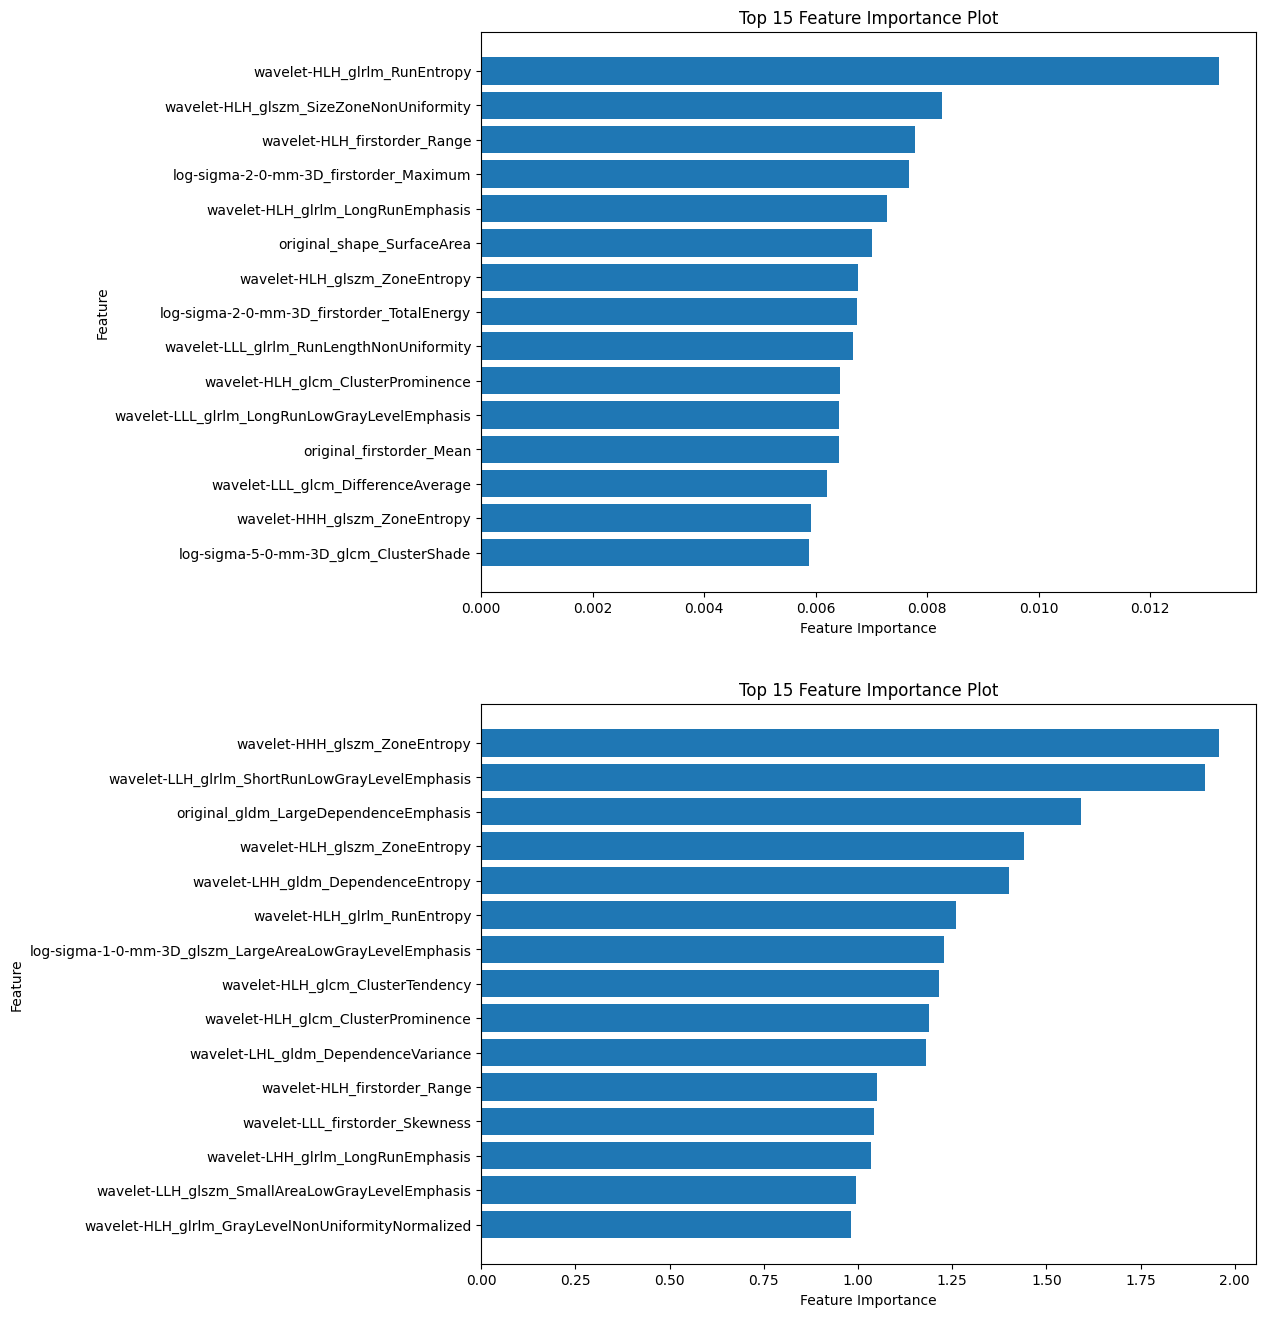

In [17]:
import catboost
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 获取特征的重要性分数
feature_importance = rf.feature_importances_

# 获取特征名称
feature_names = features.columns

# 创建一个DataFrame来存储特征的重要性
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 根据重要性分数降序排列特征
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 只选择权重最高的前15个特征
top_15_features = importance_df.head(15)

# 打印或保存权重最高的前15个特征
print(top_15_features)

# 可视化权重最高的前15个特征
plt.figure(figsize=(10, 16))
plt.subplot(2,1,1)
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance Plot')
plt.gca().invert_yaxis()  # 反转y轴，以便重要性高的特征在顶部



# 获取特征的重要性分数
feature_importance =catboost_model.get_feature_importance()

# 获取特征名称
feature_names = features.columns

# 创建一个DataFrame来存储特征的重要性
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# 根据重要性分数降序排列特征
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 只选择权重最高的前15个特征
top_15_features = importance_df.head(15)

# 打印或保存权重最高的前15个特征
print(top_15_features)

# 可视化权重最高的前15个特征
plt.subplot(2,1,2)
plt.barh(top_15_features['Feature'], top_15_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 15 Feature Importance Plot')
plt.gca().invert_yaxis()  # 反转y轴，以便重要性高的特征在顶部
plt.show()


Accuracy: 0.62


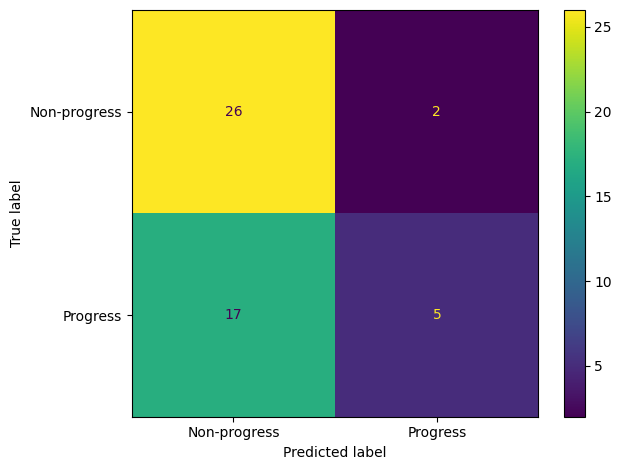

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
# 示例的真实标签和模型预测标签
y_true = y_test
y_pred = catboost_pred

# 计算准确度
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_true,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['Non-progress', 'Progress'])

cm_display.plot()
plt.tight_layout()
plt.savefig(r"D:\jupyter\innovation\ila_process_2024\figure\1alldata\cat混淆矩阵2103.jpg", dpi=600,bbox_inches = 'tight')
plt.show()

# 对比查看学习曲线，方便基于迭代次数进行参数优化

In [10]:
import catboost
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
#X_train, X_test, y_train, y_test
# 假设你已经有训练集和验证集的数据和标签

#X_val, y_val =X_test,y_test

def plot2curve(X_train,y_train,X_val,y_val,model):
# 获取训练集和验证集上的预测概率
    train_predictions = model.predict_proba(X_train)[:, 1]
    val_predictions = model.predict_proba(X_val)[:, 1]

    # 计算准确度和AUC值
    train_accuracy = accuracy_score(y_train, (train_predictions >= 0.5).astype(int))
    val_accuracy = accuracy_score(y_val, (val_predictions >= 0.5).astype(int))

    train_auc = roc_auc_score(y_train, train_predictions)
    val_auc = roc_auc_score(y_val, val_predictions)

    # 打印准确度和AUC值
    print("Train Accuracy:", train_accuracy)
    print("Validation Accuracy:", val_accuracy)
    print("Train AUC:", train_auc)
    print("Validation AUC:", val_auc)

    # 绘制准确度和AUC曲线
    iterations = model.get_best_iteration()
    iteration_range = np.arange(0, iterations + 1, 10)
    train_metrics = model.eval_metrics(Pool(X_train, label=y_train), metrics=['AUC'], plot=False)
    val_metrics = model.eval_metrics(Pool(X_val, label=y_val), metrics=['AUC'], plot=False)

    train_auc_values = [train_metrics['AUC'][i] for i in iteration_range]
    val_auc_values = [val_metrics['AUC'][i] for i in iteration_range]

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 2)
    plt.plot(iteration_range, train_auc_values, label="Train AUC")
    plt.plot(iteration_range, val_auc_values, label="Validation AUC")
    plt.xlabel("Iterations")
    plt.ylabel("AUC")
    plt.legend()
    plt.title("Learning curve: AUC")
    train_metrics = model.eval_metrics(Pool(X_train, label=y_train), metrics=['Accuracy'], plot=False)
    val_metrics = model.eval_metrics(Pool(X_val, label=y_val), metrics=['Accuracy'], plot=False)
    train_accuracy_values = [train_metrics['Accuracy'][i] for i in iteration_range]
    val_accuracy_values = [val_metrics['Accuracy'][i] for i in iteration_range]


    plt.subplot(1, 2, 1)
    plt.plot(iteration_range, train_accuracy_values, label="Train Accuracy")
    plt.plot(iteration_range, val_accuracy_values, label="Validation Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.title("Learning curve: Accuracy")
    plt.legend()

    plt.show()


Train Accuracy: 0.8879310344827587
Validation Accuracy: 0.62
Train AUC: 0.9834146341463414
Validation AUC: 0.7077922077922078


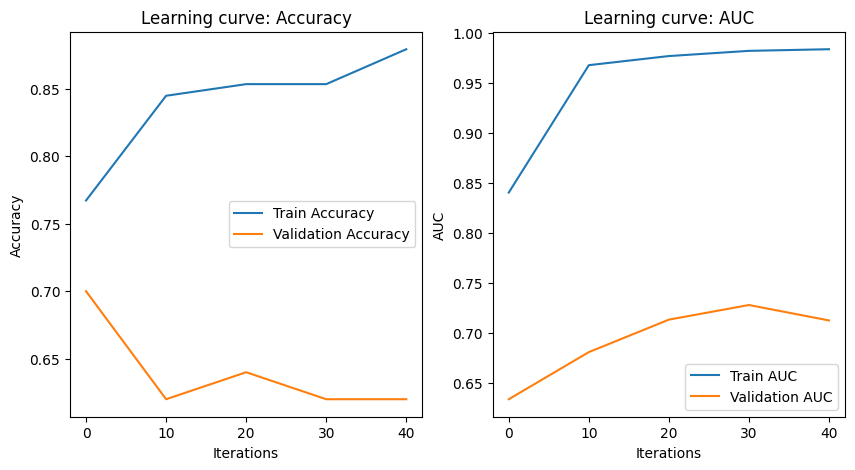

In [19]:
model=catboost_model
X_val=X_test
y_val=y_test
train_predictions = model.predict_proba(X_train)[:, 1]
val_predictions = model.predict_proba(X_val)[:, 1]

# 计算准确度和AUC值
train_accuracy = accuracy_score(y_train, (train_predictions >= 0.5).astype(int))
val_accuracy = accuracy_score(y_val, (val_predictions >= 0.5).astype(int))

train_auc = roc_auc_score(y_train, train_predictions)
val_auc = roc_auc_score(y_val, val_predictions)

# 打印准确度和AUC值
print("Train Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Train AUC:", train_auc)
print("Validation AUC:", val_auc)

# 绘制准确度和AUC曲线
iterations = model.get_best_iteration()
iteration_range = np.arange(0, iterations + 1, 10)
train_metrics = model.eval_metrics(Pool(X_train, label=y_train), metrics=['AUC'], plot=False)
val_metrics = model.eval_metrics(Pool(X_val, label=y_val), metrics=['AUC'], plot=False)

train_auc_values = [train_metrics['AUC'][i] for i in iteration_range]
val_auc_values = [val_metrics['AUC'][i] for i in iteration_range]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.plot(iteration_range, train_auc_values, label="Train AUC")
plt.plot(iteration_range, val_auc_values, label="Validation AUC")
plt.xlabel("Iterations")
plt.ylabel("AUC")
plt.legend()
plt.title("Learning curve: AUC")
train_metrics = model.eval_metrics(Pool(X_train, label=y_train), metrics=['Accuracy'], plot=False)
val_metrics = model.eval_metrics(Pool(X_val, label=y_val), metrics=['Accuracy'], plot=False)
train_accuracy_values = [train_metrics['Accuracy'][i] for i in iteration_range]
val_accuracy_values = [val_metrics['Accuracy'][i] for i in iteration_range]


plt.subplot(1, 2, 1)
plt.plot(iteration_range, train_accuracy_values, label="Train Accuracy")
plt.plot(iteration_range, val_accuracy_values, label="Validation Accuracy")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Learning curve: Accuracy")
plt.legend()
plt.savefig(r"D:\jupyter\innovation\ila_process_2024\figure\1alldata\3 learningcurve.jpg", dpi=600,bbox_inches = 'tight')
plt.show()
